# <b><span style='color:#F1A424'>AutoML - Binary Classification - Bank Churn Prediction</span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used - Bank Churn Dataset**

**Features**:

- `customer_id`: customer_id .
- `credit_score`: credit score of customer.
- `country`: country of customer.
- `gender`: Gender of customer.
- `age`: Age of customer.
- `tenure`: tenure.
- `balance`: bank balance.
- `products_number`: products number.
- `credit_card`: having credit card or not.
- `active_member`: active member or not.
- `estimated_salary`: Estimated salary of customer..

**Target Variable**:

- `churn`: 1 if the client has left the bank during some period or 0 if he/she has not.

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the Customer Churn for ABC Bank.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','bank_churn')

In [5]:
# Fetching in teradata dataframe
bank_df = DataFrame("bank_churn")

In [6]:
# first 5 rows
bank_df.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0


In [7]:
# bank_df dataset
bank_df.shape

(10000, 12)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
bank_df_sample = bank_df.sample(frac = [0.8, 0.2])

In [9]:
bank_df_sample.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,sampleid
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0,1
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0,1
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0,1
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0,1
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0,2
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0,2
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0,1
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0,1
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0,1


In [10]:
# Fetching train and test data
bank_df_train= bank_df_sample[bank_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
bank_df_test = bank_df_sample[bank_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
bank_df_train.shape

(8000, 12)

In [12]:
# test data shape
bank_df_test.shape

(2000, 12)

In [13]:
#train dataset
bank_df_train.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0
15566030,497,Germany,Male,41,5,80542.81,1,0,0,88729.22,1
15566091,545,Spain,Female,32,4,0.0,1,1,0,94739.2,0
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0


In [14]:
# test dataset
bank_df_test.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15566253,580,Germany,Male,44,9,143391.07,1,0,0,146891.07,1
15566495,704,Spain,Female,24,2,0.0,1,1,0,35600.25,1
15566563,777,France,Female,30,4,137851.31,1,1,0,5008.23,1
15566594,709,Spain,Male,23,10,0.0,2,0,0,129590.18,0
15566843,535,Germany,Male,20,9,134874.4,1,1,1,118825.56,0
15566891,584,Germany,Female,41,3,88594.93,1,1,0,178997.89,0
15566740,587,Spain,Male,51,3,83739.32,1,0,1,148798.45,0
15566380,586,Spain,Female,33,10,66948.67,2,1,1,140759.03,0
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoClassifier instance
# Excluding svm and glm from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-RECALL', early stopping timer threshold to 300 sec
# and verbose level 2 for detailed loggging

aml = AutoClassifier(exclude=['svm', 'glm'],
                     stopping_metric='MICRO-RECALL', 
                     stopping_tolerance=0.60,
                     max_runtime_secs=300,
                     verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 8000
Total Columns in the data: 12

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
tenure,BIGINT,8000,0,None,336,7664,0,0.0,100.0
gender,VARCHAR(20) CHARACTER SET LATIN,8000,0,0,None,None,None,0.0,100.0
balance,FLOAT,8000,0,None,2876,5124,0,0.0,100.0
age,INTEGER,8000,0,None,0,8000,0,0.0,100.0
active_member,BIGINT,8000,0,None,3836,4164,0,0.0,100.0
churn,BIGINT,8000,0,None,6372,1628,0,0.0,100.0
customer_id,BIGINT,8000,0,None,0,8000,0,0.0,100.0
estimated_salary,FLOAT,8000,0,None,0,8000,0,0.0,100.0
products_number,BIGINT,8000,0,None,0,8000,0,0.0,100.0
credit_card,BIGINT,8000,0,None,2374,5626,0,0.0,100.0



Statistics of Data:


func,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
min,15565701,350,18,0,0,1,0,0,11.58,0
std,71866.514,96.52,10.49,2.895,62394.098,0.587,0.457,0.5,57446.86,0.403
25%,15627879.75,585,32,3,0,1,0,0,50575.805,0
50%,15690583,652,37,5,97466.985,1,1,1,99691.065,0
75%,15752864,718,44,7,127827.333,2,1,1,149291.973,0
max,15815660,850,92,10,250898.09,4,1,1,199992.48,1
mean,15690537.42,651.179,39.011,5.017,76780.642,1.538,0.703,0.521,99844.598,0.204
count,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
country                   3         
gender                    2         

No Futile columns found.

Target Column Distribution:


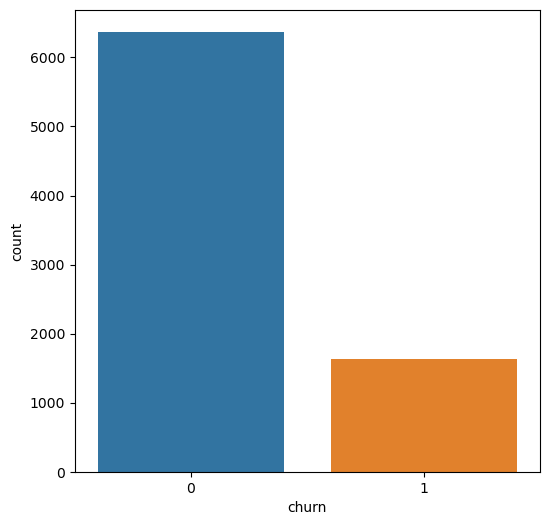

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
        ColumnName  OutlierPercentage
0  products_number             0.6750
1            churn            20.3500
2              age             3.6500
3     credit_score             0.1875


Analysis completed. No action taken.                                                    


Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171985395589128"'% - 5/17


['country', 'gender']


customer_id,credit_score,country_0,country_1,country_2,gender_0,gender_1,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,id
15663942,639,1,0,0,1,0,38,5,0.0,2,0,0,93716.38,0,25
15700627,637,0,1,0,1,0,46,2,143500.82,1,1,0,166996.46,1,41
15713637,699,1,0,0,0,1,34,2,117468.67,1,1,0,185227.42,0,49
15569364,666,1,0,0,0,1,36,3,0.0,2,1,0,35156.54,0,57
15684925,850,1,0,0,1,0,43,3,0.0,2,0,0,2465.8,0,73
15767757,562,0,0,1,1,0,29,9,120307.58,1,1,1,6795.61,0,81
15591428,781,1,0,0,0,1,29,9,0.0,2,0,0,172097.4,0,65
15737047,754,1,0,0,1,0,45,6,0.0,1,1,0,73881.68,1,33
15566958,667,0,0,1,0,1,39,7,167557.12,1,1,1,41183.02,0,17
15704053,710,0,0,1,0,1,62,3,131078.42,2,1,0,119348.76,1,9


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


customer_id,credit_score,country_0,country_1,country_2,gender_0,gender_1,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,id
15803790,638,0,1,0,0,1,37,2,89728.86,2,1,1,37294.88,0,8
15583863,681,0,1,0,0,1,49,8,142946.18,1,0,0,187280.51,1,14
15694530,672,1,0,0,0,1,28,4,167268.98,1,1,1,169469.3,0,22
15688963,731,1,0,0,1,0,52,10,0.0,1,1,1,24998.75,1,13
15614716,515,1,0,0,1,0,37,0,196853.62,1,1,1,132770.11,0,12
15685476,658,1,0,0,0,1,31,5,100082.14,1,0,1,49809.88,0,20
15809826,728,1,0,0,1,0,46,2,109705.52,1,1,0,20276.87,1,15
15667633,612,1,0,0,1,0,38,1,0.0,2,1,1,9209.21,0,23
15618203,773,0,1,0,0,1,51,8,116197.65,2,1,1,86701.4,0,11
15674811,739,0,1,0,0,1,29,3,59385.98,2,1,1,105533.96,0,19


customer_id,credit_score,country_0,country_1,country_2,gender_0,gender_1,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,id
15748589,736,1,0,0,1,0,30,9,0.0,2,1,0,34180.33,0,28
15623566,714,1,0,0,0,1,40,9,46520.69,1,1,1,96687.25,0,27
15702095,585,0,0,1,1,0,56,1,128472.8,1,1,0,186476.91,1,123
15644896,663,0,1,0,0,1,32,3,108586.86,1,1,1,182355.21,0,30
15611759,850,0,0,1,1,0,57,8,126776.3,2,1,1,132298.49,0,26
15802362,550,0,0,1,0,1,45,0,0.0,2,0,1,70399.71,0,122
15783398,535,0,0,1,1,0,49,7,115309.75,1,1,0,111421.77,0,31
15614491,539,1,0,0,0,1,39,3,139153.68,2,1,0,147662.33,0,127
15663942,639,1,0,0,1,0,38,5,0.0,2,0,0,93716.38,0,25
15788536,755,0,1,0,0,1,40,2,137430.82,2,0,0,176768.59,0,121


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
        ColumnName  OutlierPercentage
0  products_number             0.6750
1            churn            20.3500
2              age             3.6500
3     credit_score             0.1875


['credit_score', 'age', 'products_number']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171985905021738"'% - 7/17


customer_id,credit_score,country_0,country_1,country_2,gender_0,gender_1,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,id
15603378,768,1,0,0,1,0,36,3,141334.95,1,0,1,125870.5,0,32
15652808,774,1,0,0,1,0,41,5,126670.37,1,1,0,102426.06,0,48
15691104,460,0,1,0,1,0,40,6,119507.58,2,1,0,91560.63,1,56
15704583,651,1,0,0,0,1,56,2,0.0,1,1,0,114522.68,1,64
15587676,699,1,0,0,0,1,30,9,0.0,1,1,1,108162.13,0,80
15652400,667,0,0,1,0,1,56,2,168883.08,1,0,1,18897.78,0,88
15716186,586,1,0,0,1,0,38,2,0.0,2,1,0,87168.46,0,72
15702442,586,0,1,0,1,0,56,9,100781.75,2,1,1,54448.41,0,40
15717736,639,0,1,0,1,0,46,10,110031.09,2,1,1,133995.59,0,16
15803790,638,0,1,0,0,1,37,2,89728.86,2,1,1,37294.88,0,8


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171986668641141"'% - 8/17
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171984787207756"'


['country_2', 'gender_1', 'country_1', 'credit_card', 'balance', 'gender_0', 'active_member', 'tenure', 'estimated_salary', 'credit_score', 'products_number', 'country_0', 'age', 'customer_id']


['credit_card', 'balance', 'active_member', 'tenure', 'estimated_salary', 'credit_score', 'products_number', 'age', 'customer_id']


country_2,gender_1,id,country_1,gender_0,churn,country_0,credit_card,balance,active_member,tenure,estimated_salary,credit_score,products_number,age,customer_id
1,1,2,0,0,0,0,1.0,0.32392885095299057,1.0,0.2,0.09355955486110262,0.8103448275862069,0.0,0.4772727272727273,0.110647816535348
1,0,4,0,1,0,0,1.0,0.4032682353221581,1.0,0.6,0.17613111597388187,0.5818965517241379,0.5,0.5227272727272727,0.03361731245573247
0,1,5,0,0,0,1,1.0,0.36383349909120477,1.0,0.9,0.1338086737311759,0.7004310344827587,0.5,0.9090909090909091,0.8809528573315033
1,0,6,0,1,1,0,0.0,0.3732868193615982,1.0,0.4,0.7070890375814742,0.6982758620689655,0.0,0.75,0.6033469253824515
1,1,8,0,0,0,0,0.0,0.48803783241235515,0.0,0.0,0.3367075556828704,0.3857758620689655,0.0,0.45454545454545453,0.9025734190739533
0,1,9,0,0,0,1,1.0,0.42772780773261365,0.0,0.2,0.32150685169911697,0.29094827586206895,0.0,0.2727272727272727,0.4131396032829
0,1,7,0,0,1,1,1.0,0.7087420633612636,0.0,0.6,0.7548177837914503,0.36853448275862066,0.0,0.5454545454545454,0.64610785871205
0,0,3,0,1,0,1,1.0,0.0,1.0,0.7,0.0940930137934166,0.6594827586206896,0.5,0.2727272727272727,0.889032056694451
0,1,1,0,0,0,1,1.0,0.0,0.0,0.2,0.8663216028713063,0.9806034482758621,0.5,0.29545454545454547,0.8528017094769529
1,0,0,0,1,0,0,1.0,0.5536176461128102,0.0,0.3,0.3784492293326297,0.11422413793103449,0.0,0.3181818181818182,0.7853990180111324


country_2,gender_1,id,country_1,gender_0,churn,country_0,credit_card,balance,active_member,tenure,estimated_salary,credit_score,products_number,age,customer_id
1,0,809,0,1,0,0,1.0,0.0,1.0,0.4,0.33204175292594745,0.6681034482758621,0.5,0.5681818181818182,0.44111468141383986
1,1,841,0,0,0,0,0.0,0.0,1.0,0.6,0.3195516524474298,0.8405172413793104,0.5,0.2727272727272727,0.5750197078042905
0,0,537,0,1,0,1,1.0,0.0,0.0,0.5,0.7594563809929988,0.5948275862068966,0.5,0.4318181818181818,0.6904094021232408
1,1,857,0,0,0,0,1.0,0.4866907516115408,1.0,1.0,0.6383442999060408,0.6853448275862069,0.0,0.13636363636363635,0.2642046250315125
1,0,1177,0,1,1,0,0.0,0.0,0.0,0.6,0.19203501354976685,0.3426724137931034,0.0,0.4772727272727273,0.2694226913857888
0,1,569,1,0,1,0,1.0,0.48570959627472654,1.0,0.5,0.11737451787655037,0.4331896551724138,0.0,0.38636363636363635,0.07253272295829148
0,1,545,0,0,0,1,1.0,0.0,1.0,0.6,0.49572577720370503,0.44612068965517243,0.5,0.5227272727272727,0.24674971288630299
0,1,481,1,0,0,0,1.0,0.6061920997485474,1.0,0.0,0.4175720182061176,0.4482758620689655,0.5,0.5,0.829456464760045
0,1,185,0,0,0,1,1.0,0.48388028780928544,1.0,0.4,0.7981959416112772,0.7392241379310345,0.0,0.4772727272727273,0.40636492050852135
1,1,369,0,0,0,0,0.0,0.6439755679287953,1.0,0.3,0.9555183168402989,0.47413793103448276,0.0,0.36363636363636365,0.8418613771053337


['country_2', 'gender_1', 'country_1', 'gender_0', 'tenure', 'products_number', 'customer_id', 'active_member', 'credit_score', 'country_0', 'age', 'balance', 'estimated_salary']


['r_tenure', 'r_products_number', 'r_customer_id', 'r_active_member', 'r_credit_score', 'r_age', 'r_balance', 'r_estimated_salary']


id,r_gender_1,r_gender_0,churn,r_country_2,r_country_0,r_country_1,r_tenure,r_products_number,r_customer_id,r_active_member,r_credit_score,r_age,r_balance,r_estimated_salary
2,1,0,0,1,0,0,0.2,0.0,0.110647816535348,1.0,0.8103448275862069,0.4772727272727273,0.32392885095299057,0.09355955486110262
4,0,1,0,1,0,0,0.6,0.5,0.03361731245573247,1.0,0.5818965517241379,0.5227272727272727,0.4032682353221581,0.17613111597388187
5,1,0,0,0,1,0,0.9,0.5,0.8809528573315033,1.0,0.7004310344827587,0.9090909090909091,0.36383349909120477,0.1338086737311759
6,0,1,1,1,0,0,0.4,0.0,0.6033469253824515,1.0,0.6982758620689655,0.75,0.3732868193615982,0.7070890375814742
8,1,0,0,1,0,0,0.0,0.0,0.9025734190739533,0.0,0.3857758620689655,0.45454545454545453,0.48803783241235515,0.3367075556828704
9,1,0,0,0,1,0,0.2,0.0,0.4131396032829,0.0,0.29094827586206895,0.2727272727272727,0.42772780773261365,0.32150685169911697
7,1,0,1,0,1,0,0.6,0.0,0.64610785871205,0.0,0.36853448275862066,0.5454545454545454,0.7087420633612636,0.7548177837914503
3,0,1,0,0,1,0,0.7,0.5,0.889032056694451,1.0,0.6594827586206896,0.2727272727272727,0.0,0.0940930137934166
1,1,0,0,0,1,0,0.2,0.5,0.8528017094769529,0.0,0.9806034482758621,0.29545454545454547,0.0,0.8663216028713063
0,0,1,0,1,0,0,0.3,0.0,0.7853990180111324,0.0,0.11422413793103449,0.3181818181818182,0.5536176461128102,0.3784492293326297


id,r_gender_1,r_gender_0,churn,r_country_2,r_country_0,r_country_1,r_tenure,r_products_number,r_customer_id,r_active_member,r_credit_score,r_age,r_balance,r_estimated_salary
809,0,1,0,1,0,0,0.4,0.5,0.44111468141383986,1.0,0.6681034482758621,0.5681818181818182,0.0,0.33204175292594745
841,1,0,0,1,0,0,0.6,0.5,0.5750197078042905,1.0,0.8405172413793104,0.2727272727272727,0.0,0.3195516524474298
537,0,1,0,0,1,0,0.5,0.5,0.6904094021232408,0.0,0.5948275862068966,0.4318181818181818,0.0,0.7594563809929988
857,1,0,0,1,0,0,1.0,0.0,0.2642046250315125,1.0,0.6853448275862069,0.13636363636363635,0.4866907516115408,0.6383442999060408
1177,0,1,1,1,0,0,0.6,0.0,0.2694226913857888,0.0,0.3426724137931034,0.4772727272727273,0.0,0.19203501354976685
569,1,0,1,0,0,1,0.5,0.0,0.07253272295829148,1.0,0.4331896551724138,0.38636363636363635,0.48570959627472654,0.11737451787655037
545,1,0,0,0,1,0,0.6,0.5,0.24674971288630299,1.0,0.44612068965517243,0.5227272727272727,0.0,0.49572577720370503
481,1,0,0,0,0,1,0.0,0.5,0.829456464760045,1.0,0.4482758620689655,0.5,0.6061920997485474,0.4175720182061176
185,1,0,0,0,1,0,0.4,0.0,0.40636492050852135,1.0,0.7392241379310345,0.4772727272727273,0.48388028780928544,0.7981959416112772
369,1,0,0,1,0,0,0.3,0.0,0.8418613771053337,1.0,0.47413793103448276,0.36363636363636365,0.6439755679287953,0.9555183168402989


['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']


country_2,id,gender_1,country_1,gender_0,churn,country_0,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,10,1,1,0,1,0,0.1756855714863086,0.7219827586206896,0.22727272727272727,0.9,0.6156903785118493,0.5,0.0,1.0,0.5065502375585095
0,14,1,1,0,1,0,0.07262475940472427,0.6357758620689655,0.7045454545454546,0.8,0.569738015941054,0.0,0.0,0.0,0.9365358906288666
0,22,1,0,0,0,1,0.5154681253776495,0.6163793103448276,0.22727272727272727,0.4,0.6666809619794236,0.0,1.0,1.0,0.8474616516692709
0,12,0,0,1,0,1,0.19608564991736727,0.27801724137931033,0.4318181818181818,0.0,0.7845959289686103,0.0,1.0,1.0,0.66392822414337
0,13,0,0,1,1,1,0.4931913037562875,0.7435344827586207,0.7727272727272727,1.0,0.0,0.0,1.0,1.0,0.1249613671111641
1,21,0,0,1,0,0,0.5637752550009804,0.8060344827586207,0.3409090909090909,0.1,0.47076595919881253,0.5,0.0,1.0,0.7834031209172914
1,9,1,0,0,1,0,0.553575215785451,0.6982758620689655,1.0,0.3,0.5224368985830065,0.5,1.0,0.0,0.5968077681462555
1,17,1,0,0,0,0,0.004977971276625544,0.6056034482758621,0.4772727272727273,0.7,0.6678293963895859,0.0,1.0,1.0,0.20589924462575254
0,8,1,1,0,0,0,0.9526812617796647,0.5431034482758621,0.4318181818181818,0.2,0.3576307017721817,0.5,1.0,1.0,0.1864545740240157
0,16,0,1,1,0,0,0.6083288982437045,0.5452586206896551,0.6363636363636364,1.0,0.4385489343501977,0.5,1.0,1.0,0.6700568756140004


country_2,id,gender_1,country_1,gender_0,churn,country_0,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
1,31,0,0,1,0,0,0.8710809480554299,0.32112068965517243,0.7045454545454546,0.7,0.4595879944721779,0.0,1.0,0.0,0.557164723036444
0,28,0,0,1,0,1,0.7317897887563475,0.7543103448275862,0.2727272727272727,0.9,0.0,0.5,1.0,0.0,0.17087864341898615
1,124,1,0,0,0,0,0.3210951536808576,0.14224137931034483,0.5909090909090909,0.3,0.3543903024530797,0.0,1.0,0.0,0.34850196410106943
0,29,0,0,1,0,1,0.4403143644883374,0.665948275862069,0.11363636363636363,0.1,0.0,0.5,1.0,1.0,0.7088684509376816
0,25,0,0,1,0,1,0.39306765479129735,0.5452586206896551,0.45454545454545453,0.5,0.0,0.5,0.0,0.0,0.46861969214113525
0,121,1,1,0,0,0,0.8916410898715892,0.7952586206896551,0.5,0.2,0.5477555448907563,0.5,0.0,0.0,0.8839655557664875
1,24,0,0,1,0,0,0.14883894022032726,0.4698275862068966,0.5227272727272727,1.0,0.0,0.5,1.0,1.0,0.8312337879394973
0,120,1,0,0,0,1,0.4993097266517541,0.5150862068965517,0.5227272727272727,0.6,0.3892542984284974,0.5,1.0,0.0,0.28564432857189437
0,30,1,1,0,0,0,0.31685347397569436,0.5969827586206896,0.3181818181818182,0.3,0.43279269284194233,0.0,1.0,1.0,0.9119043608704898
1,126,0,0,1,0,0,0.37013457329102323,0.3728448275862069,0.4772727272727273,0.2,0.0,0.5,1.0,1.0,0.6058213087112388


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9']


response_column : churn                                                                                                                               
name : knn
model_type : Classification
k : (3, 5, 6, 8, 10, 12)
id_column : id
voting_weight : 1.0
Total number of models for knn : 6
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : churn
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.2, 0.3)
max_depth : (5, 4, 6, 7)
min_node_size : (1, 3, 4)
num_trees : (-1, 30, 40)
seed : 42
Total number of models for decision_forest : 108
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : churn
name : xgboost
model_type : Classification
colu

result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171988672351175"'                                                                                                                       
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171985385210466"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171985925271752"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171985176064319"'                                                                                                                       
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171985570138521"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171992394726124"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171992462576579"'                                                                                                                       
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171985504266785"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171985722675684"'


,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,DECISIONFOREST_2,pca,0.818750,0.818750,0.818750,0.818750,0.764971,0.584888,0.597713,0.800773,0.818750,0.774393
1,2,DECISIONFOREST_1,rfe,0.806875,0.806875,0.806875,0.806875,0.705504,0.717808,0.711174,0.812998,0.806875,0.809681
2,3,DECISIONFOREST_0,lasso,0.806875,0.806875,0.806875,0.806875,0.705504,0.717808,0.711174,0.812998,0.806875,0.809681
3,4,XGBOOST_2,pca,0.805625,0.805625,0.805625,0.805625,0.690436,0.621156,0.639010,0.779505,0.805625,0.784319
4,5,DECISIONFOREST_3,lasso,0.796250,0.796250,0.796250,0.796250,0.690209,0.702006,0.695612,0.802907,0.796250,0.799313
5,6,KNN_13,rfe,0.793750,0.793750,0.793750,0.793750,0.684360,0.690165,0.687138,0.797079,0.793750,0.795348
6,7,KNN_4,rfe,0.790625,0.790625,0.790625,0.790625,0.681878,0.692768,0.686872,0.797194,0.790625,0.793667
7,8,KNN_9,lasso,0.787500,0.787500,0.787500,0.787500,0.671484,0.669121,0.670280,0.786050,0.787500,0.786763
8,9,KNN_0,lasso,0.783125,0.783125,0.783125,0.783125,0.667530,0.670939,0.669185,0.785362,0.783125,0.784217
9,10,XGBOOST_1,rfe,0.779375,0.779375,0.779375,0.779375,0.690456,0.745050,0.706078,0.820141,0.779375,0.793044


In [16]:
# Fitting train data
aml.fit(bank_df_train, bank_df_train.churn)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,DECISIONFOREST_2,pca,0.818750,0.818750,0.818750,0.818750,0.764971,0.584888,0.597713,0.800773,0.818750,0.774393
1,2,DECISIONFOREST_1,rfe,0.806875,0.806875,0.806875,0.806875,0.705504,0.717808,0.711174,0.812998,0.806875,0.809681
2,3,DECISIONFOREST_0,lasso,0.806875,0.806875,0.806875,0.806875,0.705504,0.717808,0.711174,0.812998,0.806875,0.809681
3,4,XGBOOST_2,pca,0.805625,0.805625,0.805625,0.805625,0.690436,0.621156,0.639010,0.779505,0.805625,0.784319
4,5,DECISIONFOREST_3,lasso,0.796250,0.796250,0.796250,0.796250,0.690209,0.702006,0.695612,0.802907,0.796250,0.799313
5,6,KNN_13,rfe,0.793750,0.793750,0.793750,0.793750,0.684360,0.690165,0.687138,0.797079,0.793750,0.795348
6,7,KNN_4,rfe,0.790625,0.790625,0.790625,0.790625,0.681878,0.692768,0.686872,0.797194,0.790625,0.793667
7,8,KNN_9,lasso,0.787500,0.787500,0.787500,0.787500,0.671484,0.669121,0.670280,0.786050,0.787500,0.786763
8,9,KNN_0,lasso,0.783125,0.783125,0.783125,0.783125,0.667530,0.670939,0.669185,0.785362,0.783125,0.784217
9,10,XGBOOST_1,rfe,0.779375,0.779375,0.779375,0.779375,0.690456,0.745050,0.706078,0.820141,0.779375,0.793044


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,DECISIONFOREST_2,pca,0.81875,0.81875,0.81875,0.81875,0.764971,0.584888,0.597713,0.800773,0.81875,0.774393


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [21]:
# Generating prediction and metrics on test data
prediction = aml.predict(bank_df_test)

Data Transformation started ...


gender,credit_card,id,balance,active_member,country,tenure,estimated_salary,credit_score,products_number,age,customer_id,churn
Male,1,9,130747.1,0,France,3,143829.54,757,1,47,15668775,0
Female,1,13,0.0,0,France,9,126838.7,579,2,27,15629133,0
Female,0,21,0.0,1,France,8,109179.89,649,2,36,15594915,0
Female,1,10,108862.76,0,Germany,4,79555.08,655,1,37,15576216,1
Female,1,12,136650.89,1,Germany,5,41865.72,689,1,30,15664615,1
Female,0,20,142856.95,0,France,7,38019.74,723,2,40,15638513,0
Male,1,14,0.0,0,Spain,8,132152.32,665,2,41,15679909,0
Female,1,22,112203.25,0,France,1,182266.01,527,1,31,15796612,0
Female,1,11,0.0,0,Spain,3,133997.53,569,1,34,15603582,0
Female,1,19,120549.29,0,France,0,175722.31,681,2,41,15681316,0


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171988913201439"'⫾⫾⫾⫾｜ 50% - 5/10


gender_0,gender_1,credit_card,id,balance,active_member,country_0,country_1,country_2,tenure,estimated_salary,credit_score,products_number,age,customer_id,churn
0,1,0,57,0.0,1,0,0,1,7,145151.96,700,2,31,15625522,0
0,1,1,89,140080.32,1,0,1,0,2,157908.19,710,3,43,15672056,1
0,1,1,97,178755.84,0,1,0,0,9,199929.17,569,1,37,15762331,0
0,1,0,105,161889.79,0,1,0,0,8,75562.47,696,1,44,15690898,0
0,1,1,145,118962.58,1,1,0,0,1,120819.58,817,1,59,15778481,0
0,1,1,161,181656.51,1,0,1,0,0,107667.91,742,1,33,15736534,0
1,0,1,32,0.0,0,0,0,1,1,19525.65,632,2,32,15771856,0
1,0,1,56,75900.84,1,0,1,0,1,192154.66,794,1,54,15577806,0
1,0,0,96,0.0,1,1,0,0,6,8814.69,672,1,28,15644446,0
1,0,0,104,128298.74,0,0,1,0,9,149614.17,516,1,47,15724321,1


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171989777083154"'⫾⫾⫾⫾｜ 60% - 6/10


id,country_2,gender_1,country_1,credit_card,balance,gender_0,active_member,tenure,estimated_salary,credit_score,products_number,country_0,age,customer_id,churn
312,1,0,0,1,149592.14,1,1,6,153771.8,564,1,0,24,15765732,0
90,1,0,0,1,0.0,1,0,7,80619.09,530,2,0,36,15617507,0
218,1,0,0,1,0.0,1,0,8,89043.19,640,2,0,46,15742854,0
362,1,0,0,0,0.0,1,0,1,7455.2,803,2,0,37,15616380,0
378,1,0,0,1,154733.97,1,0,1,80259.67,727,1,0,52,15719991,1
418,1,0,0,0,70417.79,1,1,10,90896.04,606,1,0,23,15607753,0
104,0,0,1,0,128298.74,1,0,9,149614.17,516,1,0,47,15724321,1
208,0,0,0,1,79340.95,1,0,0,78255.86,594,1,1,31,15683657,0
224,0,0,0,1,0.0,1,1,3,151978.36,593,2,1,32,15626233,0
296,0,0,1,1,115301.31,1,0,10,43527.4,716,1,0,39,15807923,1


country_2,gender_1,id,country_1,gender_0,churn,country_0,credit_card,balance,active_member,tenure,estimated_salary,credit_score,products_number,age,customer_id
0,0,224,0,1,0,1,1.0,0.0,1.0,0.3,0.7599890897721314,0.44612068965517243,0.5,0.3181818181818182,0.24217190007242867
0,0,336,1,1,0,0,0.0,0.4225728860670083,0.0,0.8,0.7437310698844706,0.5560344827586207,0.5,0.5909090909090909,0.11780264984934034
0,0,352,0,1,0,1,0.0,0.3230093142598256,1.0,0.5,0.5490800721507332,0.8146551724137931,0.0,0.4772727272727273,0.17891885186533868
0,0,384,1,1,1,0,0.0,0.5559757350085845,0.0,0.8,0.7505619647532027,0.1788793103448276,1.0,0.7727272727272727,0.5253080219767028
0,0,456,1,1,0,0,1.0,0.410920505612458,0.0,0.7,0.8665021397369344,0.6982758620689655,0.5,0.13636363636363635,0.6038031060299879
0,0,464,0,1,0,1,0.0,0.744510928720103,0.0,0.1,0.8913872712807956,0.9310344827586207,0.0,0.29545454545454547,0.6885846795330951
1,0,184,0,1,0,0,1.0,0.0,0.0,0.4,0.7209967275317621,0.4375,0.5,0.20454545454545456,0.7280202960372307
1,0,248,0,1,1,0,1.0,0.0,0.0,0.7,0.2913425921573185,0.7392241379310345,0.5,0.5454545454545454,0.6538429217970316
1,0,312,0,1,0,0,1.0,0.5962266990553815,1.0,0.6,0.7689581212483589,0.38362068965517243,0.0,0.13636363636363635,0.8003889540257942
1,0,376,0,1,0,0,1.0,0.0,1.0,0.7,0.32976768856200434,0.5366379310344828,0.5,0.38636363636363635,0.14072772818035942


id,country_2,gender_1,country_1,gender_0,tenure,products_number,customer_id,active_member,credit_score,country_0,age,balance,estimated_salary,churn
224,0,0,0,1,3,2,15626233,1,593,1,32,0.0,151978.36,0
336,0,0,1,1,8,2,15595153,0,644,0,44,106022.73,148727.42,0
352,0,0,0,1,5,1,15610426,1,764,1,39,81042.42,109805.17,0
384,0,0,1,1,8,3,15696989,0,469,0,52,139493.25,150093.32,1
456,0,0,1,1,7,2,15716605,0,710,0,24,103099.17,173276.62,0
464,0,0,0,1,1,1,15737792,0,818,1,31,186796.37,178252.63,0
184,1,0,0,1,4,2,15747647,0,589,0,27,0.0,144181.48,0
248,1,0,0,1,7,2,15729110,0,729,0,42,0.0,58268.2,1
312,1,0,0,1,6,1,15765732,1,564,0,24,149592.14,153771.8,0
376,1,0,0,1,7,2,15600882,1,635,0,35,0.0,65951.65,0


id,r_gender_1,r_gender_0,churn,r_country_2,r_country_0,r_country_1,r_tenure,r_products_number,r_customer_id,r_active_member,r_credit_score,r_age,r_balance,r_estimated_salary
224,0,1,0,0,1,0,0.3,0.5,0.24217190007242867,1.0,0.44612068965517243,0.3181818181818182,0.0,0.7599890897721314
336,0,1,0,0,0,1,0.8,0.5,0.11780264984934034,0.0,0.5560344827586207,0.5909090909090909,0.4225728860670083,0.7437310698844706
352,0,1,0,0,1,0,0.5,0.0,0.17891885186533868,1.0,0.8146551724137931,0.4772727272727273,0.3230093142598256,0.5490800721507332
384,0,1,1,0,0,1,0.8,1.0,0.5253080219767028,0.0,0.1788793103448276,0.7727272727272727,0.5559757350085845,0.7505619647532027
456,0,1,0,0,0,1,0.7,0.5,0.6038031060299879,0.0,0.6982758620689655,0.13636363636363635,0.410920505612458,0.8665021397369344
464,0,1,0,0,1,0,0.1,0.0,0.6885846795330951,0.0,0.9310344827586207,0.29545454545454547,0.744510928720103,0.8913872712807956
184,0,1,0,1,0,0,0.4,0.5,0.7280202960372307,0.0,0.4375,0.20454545454545456,0.0,0.7209967275317621
248,0,1,1,1,0,0,0.7,0.5,0.6538429217970316,0.0,0.7392241379310345,0.5454545454545454,0.0,0.2913425921573185
312,0,1,0,1,0,0,0.6,0.0,0.8003889540257942,1.0,0.38362068965517243,0.13636363636363635,0.5962266990553815,0.7689581212483589
376,0,1,0,1,0,0,0.7,0.5,0.14072772818035942,1.0,0.5366379310344828,0.38636363636363635,0.0,0.32976768856200434


country_2,gender_1,id,country_1,gender_0,churn,country_0,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
1,0,312,0,1,0,0,0.8003889540257942,0.38362068965517243,0.13636363636363635,0.6,0.5962266990553815,0.0,1.0,1.0,0.7689581212483589
1,0,90,0,1,0,0,0.20725407261275466,0.3103448275862069,0.4090909090909091,0.7,0.0,0.5,1.0,0.0,0.40311986707685704
1,0,218,0,1,0,0,0.7088407009175633,0.5474137931034483,0.6363636363636364,0.8,0.0,0.5,1.0,0.0,0.44524896983964124
1,0,362,0,1,0,0,0.20274428673754807,0.8987068965517241,0.4318181818181818,0.1,0.0,0.5,0.0,0.0,0.0372257014882439
1,0,378,0,1,1,0,0.6173524715787452,0.7349137931034483,0.7727272727272727,0.1,0.6167203983099273,0.0,1.0,0.0,0.4013224000340869
1,0,418,0,1,0,0,0.16822261615599776,0.47413793103448276,0.11363636363636363,1.0,0.280662917760753,0.0,0.0,1.0,0.45451511198586747
0,0,104,1,1,1,0,0.6346793330158743,0.2801724137931034,0.6590909090909091,0.9,0.5113579780539581,0.0,0.0,0.0,0.7481657254411352
0,0,208,0,1,0,1,0.4719588957227062,0.4482758620689655,0.29545454545454547,0.0,0.31622779591506656,0.0,1.0,0.0,0.3913013037262209
0,0,224,0,1,0,1,0.24217190007242867,0.44612068965517243,0.3181818181818182,0.3,0.0,0.5,1.0,1.0,0.7599890897721314
0,0,296,1,1,1,0,0.9692198110451739,0.7112068965517241,0.4772727272727273,1.0,0.45955435531613653,0.0,1.0,0.0,0.21762353872660797


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,churn
0,184,0.776790,0.473809,0.477311,0.829972,-0.400964,0.283001,0.331651,-0.093403,0.068621,0.109239,0
1,104,0.843038,0.658173,-0.692446,0.192111,0.799737,-0.059159,-0.111942,-0.416781,-0.304868,0.317167,1
2,248,0.776521,0.481653,0.477548,0.827098,-0.408534,0.307804,-0.018047,0.164879,-0.239939,-0.160847,1
3,208,0.791200,-0.646681,-0.272610,0.379252,-0.240747,-0.396236,0.229254,0.268843,0.259226,0.098150,0
4,312,0.744422,0.588901,0.798757,-0.108589,-0.439674,-0.337795,0.205343,-0.379076,-0.231308,0.169857,0
5,224,0.758941,-0.646535,0.242139,-0.469899,-0.318949,0.257026,0.020308,-0.089121,0.444314,0.110760,0
6,376,0.742384,0.518661,0.922281,-0.058565,-0.474114,0.287220,-0.408279,0.121698,0.105325,0.031933,0
7,296,0.836170,0.632495,-0.834148,0.173498,-0.184119,-0.029711,-0.035203,0.021412,-0.767650,-0.127779,1
8,90,0.774019,0.476249,0.473842,0.834215,-0.418997,0.296086,-0.323467,0.077296,0.103364,0.251060,0
9,336,0.841091,0.642902,-0.656483,0.200905,0.791490,0.343342,-0.394807,-0.272540,0.183997,0.029528,0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being used for generating prediction :
Model ID : DECISIONFOREST_2 
Feature Selection Method : pca

Prediction : 
    id  prediction  prob  churn
0  248           0   1.0      1
1  312           0   1.0      0
2  224           0   1.0      0
3  376           0   1.0      0
4   90           0   1.0      0
5  336           0   1.0      0
6  296           0   1.0      1
7  208           0   1.0      0
8  104           1   1.0      1
9  184           0   1.0      0

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1     1567      345   0.819561  0.984915  0.894662     1591
1               1  CLASS_2       24       64   0.727273  0.156479  0.257545      409

ROC-AUC : 


AUC,GINI
0.5695169497125487,0.13903389942509747


threshold_value,tpr,fpr
0.04081632653061224,0.15647921760391198,0.01508485229415462
0.08163265306122448,0.15647921760391198,0.01508485229415462
0.1020408163265306,0.15647921760391198,0.01508485229415462
0.12244897959183673,0.15647921760391198,0.01508485229415462
0.16326530612244897,0.15647921760391198,0.01508485229415462
0.18367346938775508,0.15647921760391198,0.01508485229415462
0.14285714285714285,0.15647921760391198,0.01508485229415462
0.061224489795918366,0.15647921760391198,0.01508485229415462
0.02040816326530612,0.15647921760391198,0.01508485229415462
0.0,1.0,1.0



Confusion Matrix : 


array([[1567,   24],
       [ 345,   64]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,prediction,prob,churn
10,0,1.0,1
12,0,1.0,1
13,0,1.0,0
14,0,1.0,0
16,0,1.0,0
17,0,1.0,0
15,0,1.0,1
11,0,1.0,0
9,0,1.0,0
8,0,1.0,0


In [23]:
remove_context()

True